# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Homework 2  AC 209 : Linear and k-NN Regression


**Harvard University**<br/>
**Fall 2018**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader

<hr style="height:2pt">


In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach. And if a problem specifies a particular library you're required to use that library, and possibly others from the import list.

Names of people you have worked with goes here: 

<hr style="height:2pt">

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
%matplotlib inline

<hr style="height:2pt">


<div class='theme'>Linear Algebra, Accuracy, and Confidence Intervals </div>
In this part of the homework, you will see how _uncertainty_ in the beta coefficients can directly impact our ability to make predictions with a linear regression model and how in general we can do inference on the predictors. You will explore a linear-algebra formula that tells us how accurately we've learned the beta parameters, going beyond simple SEs to describe the joint distribution of the betas. You'll see that the structure of the $X$ data can strongly impact how well we can learn the betas, and you'll determine desirable prroperties of the $X$ data.

The data for this supplement are the same as in lab1, and are imported for you in the cells below.

In [3]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("data/cleaned_mtcars.csv")
df.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
y = df[['mpg']].values
X = df[['cyl','disp','hp','wt','qsec']]
X = sm.add_constant(X)

---- 


<div class='exercise'> <b> Question 5 [4 pts] </b> </div>

**5.1** Fit a simple linear regression model predicting `mpg` via `disp`. Use the `FittedOLS.get_prediction().summary_frame()` method to access the confidence intervals for our prediction at various values of `disp` and make a well-labeled plot showing
 1. The observed values of `disp` and `mpg`.
 2. The regression line.
 3. The upper and lower bounds of the 95% confidence interval for the _predicted_ (not the observed) `mpg` at any given displacement.
 
**5.2** Why do we have a confidence interval for our predicted value? Why isn't the prediction just a single number?

**5.3** Someone asks what `mpg` you would predict for a `disp` value of 400. What do you tell them? paying attention to the confidence interval (5.1.3) above?

**5.4** Why does the 95% confidence interval for the predicted `mpg` appear to curve as we move away from the data's center? 

### Answers

**5.1 Fit a linear regression model predicting `mpg` via `disp`. Use the `FittedOLS.get_prediction().summary_frame()` method to access the confidence intervals for our prediction at various levels of `disp` and make a well-labled plot showing**
 1. **The observed values of weight and mpg**
 2. **The regression line**
 3. **The upper and lower bounds of the 95% confidence interval for the _mean/predicted mpg_ at any given displacement**
 

In [5]:
# your code here 
df = df.rename(columns={"Unnamed: 0":"car name"})
df.head()
y_train = np.array(df.mpg)
x_train = np.array(df.disp)
x_train = sm.add_constant(x_train)
regression = sm.OLS(y_train, x_train).fit()
regression.get_prediction(x_train).summary_frame().head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,23.005436,0.664391,21.648568,24.362303,16.227868,29.783003
1,23.005436,0.664391,21.648568,24.362303,16.227868,29.783003
2,25.148622,0.815316,23.483523,26.813720,18.302683,31.994561
3,18.966354,0.588977,17.763503,20.169205,12.217933,25.714774
4,14.762412,0.837509,13.051990,16.472833,7.905308,21.619515


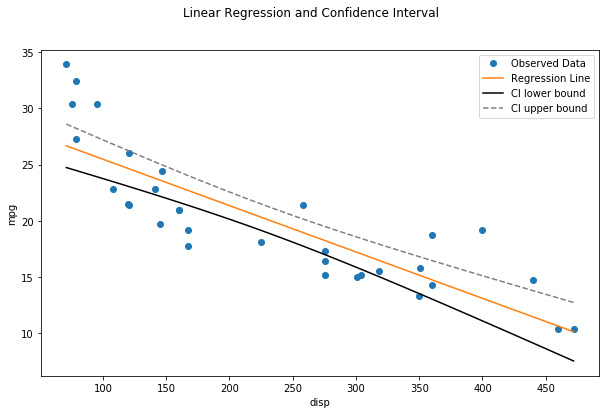

In [6]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
fig.suptitle('Linear Regression and Confidence Interval')
ax.plot(df.disp, df.mpg, 'o', label='Observed Data')
grid = np.linspace(np.min(df.disp), np.max(df.disp), 100)
ax.plot(grid, regression.get_prediction(sm.add_constant(grid)).summary_frame()['mean'],label='Regression Line')
ax.plot(grid, regression.get_prediction(sm.add_constant(grid)).summary_frame()['mean_ci_lower'], color = 'black',label='CI lower bound')
ax.plot(grid, regression.get_prediction(sm.add_constant(grid)).summary_frame()['mean_ci_upper'],'--' , color = 'grey',label='CI upper bound')
ax.set_xlabel('disp')
ax.set_ylabel('mpg')
ax.legend(loc='upper right')

**5.2 Why do we have a confidience interval for our predicted value? Why isn't the prediction just a single number?**

*your answer here*

There are errors in our model and we can not get rid of them, so things do not happen for sure. We use a confidence interval to grab more information than a single number. We have no confidence that the next observation will fall right onto the single number but we are 95% confident that it will fall into the confidence interval of the predicted value.

**5.3 Someone asks what `mpg` you would predict for a `disp` value of 400. What do you tell them, paying attention to the confidence interval (5.2.3) above?**

In [7]:
# your code here
x_test = np.array([1, 400])
regression.get_prediction(x_test).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,13.113807,0.983136,11.105976,15.121638,6.176537,20.051077


*your answer here*

For a disp value of 400, the 95% confidence interval of expectation of mpg is (11.105976, 15.121638). But if we just do one experiment, the 95% prediction interval of the newly picked mpg with disp 400 is (6.176537, 20.051077).

**5.4 Why does the 95% confidence interval for the predicted `mpg` appear to curve as we move away from the data's center?**

*your answer here*

The variability of the sampling distribution of the predicted value $\hat{y_{i}}$ is affected by how far the specific predictor $x_{i}$ is away from the mean predictor value $\bar{x}$. 

All possible regression lines generated by OLS go through the data's center $(\bar{x}, \bar{y})$. However, they may have different slopes. If we imagine two different regression lines intersecting at the data's center, the y-coordinates are close when the x-coordinates are close to the intersection $(\bar{x}, \bar{y})$, but the ends of the regression lines extend to different directions. Therefore, the prediction interval gets wider as the x-coordinate moves away from $\bar{x}$.

<div class='exercise'><b> Question 6 [8 pts] </b></div>
Hopefully, in the question above you recognized that uncertainty in the beta coefficients could impact the certainty of our predictions. In this question and the next, we're going to explore properties of the data that can make us more or less certain of the values of the betas.

**6.1** Fit a multiple linear regression to the full X matrix (on the car data). That is, predict `mpg` using `cyl`,`disp`,`hp`,`wt`, and `qsec`.

**6.2** The formula for the covariance of the vector of betas, assuming the linear regression model holds, is:
$${\rm Cov}(\beta) = \sigma^2\left(X^TX\right)^{-1}.$$
Compute and display this matrix for the car data. 

**6.3** Verify that the SE reported by statsmodels matches the square root of the variance listed for that variable in your calculated covariance matrix.

**6.4** Interpret the matrix formula above. At a minimum, discuss what affects our ability to estimate the betas accurately. When would you expect two betas to have large/small covariances? [This is intended as an open-ended question. You will be graded only on the specified minimum].

**Hint**: we don't know $\sigma^2$, but we can estimate them.<BR>
**Hint**: remember that numpy's normal distribution expects a standard deviation and not a variance.

### Answers

**6.1 Fit a multiple linear regression to the full X matrix (on the car data). That is, predict `mpg` using `cyl`,`disp`,`hp`,`wt`, and `qsec`.**

In [8]:
# your code here
regression7 = sm.OLS(y, X).fit()

**6.2 The formula for the covariance of the vector of betas, assuming the linear regression model holds, is:
$${\rm Cov}(\beta) = \sigma^2\left(X^TX\right)^{-1}.$$
Compute and display this matrix for the car data. **

In [9]:
# your code here
y_pred = regression7.get_prediction(X).summary_frame()['mean']
s = []
for i in range(len(y)):
    s.append(np.power((y_pred[i] -y[i]), 2))
squaredse = np.mean(s)
cov = squaredse*(np.matrix(X).T*np.matrix(X)).I
cov

matrix([[ 7.99244198e+01, -3.07189521e+00,  1.53550715e-02,
         -6.81044250e-02,  4.02998464e+00, -3.76891870e+00],
        [-3.07189521e+00,  4.15656681e-01, -3.33772420e-03,
         -1.01645367e-03, -1.38010017e-01,  1.04389341e-01],
        [ 1.53550715e-02, -3.33772420e-03,  1.15201605e-04,
         -1.98165508e-05, -7.19076905e-03,  2.66624200e-04],
        [-6.81044250e-02, -1.01645367e-03, -1.98165508e-05,
          1.89384176e-04, -3.92076737e-03,  3.57445991e-03],
        [ 4.02998464e+00, -1.38010017e-01, -7.19076905e-03,
         -3.92076737e-03,  1.27438199e+00, -2.82476803e-01],
        [-3.76891870e+00,  1.04389341e-01,  2.66624200e-04,
          3.57445991e-03, -2.82476803e-01,  1.93064697e-01]])

**6.3 Verify that the SE reported by statsmodels matches the square root of the variance listed for that variable in your calculated covariance matrix.**

In [10]:
# your code here
sbeta = []
for i in range(6):
    sbeta.append(np.sqrt(cov[i,i]))
print(sbeta)

[8.940045852499194, 0.6447144182055352, 0.010733201053817986, 0.013761692327588696, 1.128885288315206, 0.4393912805583459]


In [11]:
regression7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     29.51
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           6.18e-10
Time:                        15:21:23   Log-Likelihood:                -72.003
No. Observations:                  32   AIC:                             156.0
Df Residuals:                      26   BIC:                             164.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.8736      9.918      3.617      0.001      15.487      56.261
cyl           -1.1561      0.715     -1.616      0.118      -2.626       0.314
disp           0.0119      0.012      1.004      0.325      -0.013       0.036
hp            -0.0158      0.015     -1.037      0.309      -0.047       0.016
wt            -4.2253      1.252     -3.374      0.002      -6.800      -1.651
qsec           0.2538      0.487      0.521      0.607      -0.748       1.256
==============================================================================
Omnibus:                        4.925   Durbin-Watson:                   1.682
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                3.534
Skew:                           0.782   Prob(JB):                        0.171
Kurtosis:                       3.453   Cond. No.                     6.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*your answer here*

The calculation result from the matrix is $[8.940045852499194, 0.6447144182055352, 0.010733201053817986, 0.013761692327588696, 1.128885288315206, 0.4393912805583459]$. 

The column of 'std err' in the regression result is $[9.918, 0.715, 0.012, 0.015, 1.252, 0.487]$. 

It is clear that they are quite close.

**6.4 Interpret the matrix formula above. At a minimum, discuss what affects our ability to accurately estimate the betas. When would you expect two betas to have large/small covariances? [This is intended as an open-ended question. You will only be graded on the specified minimum].**

*your answer here*

The collinearity between  independent variables would affect our ability to estimate the betas. We expect two betas to have large covariances if there is a strong linear relationship between the two independent variables, which makes the betas difficult to estimate in regression.

<div class='exercise'> <b> Question 7 [12 pts]: What affects our knowledge of the betas? </b></div> 


**7.1** Create a separate dataset `edit1` with a new column `noise` that is totally independent of the other columns (random values from an exponential distribution). What effects do you see on our ability to estimate the betas?

**7.2** Create a separate dataset `edit2` with a new column `ratio` that is the ratio of a car's horsepower to its weight. What change do you see in our certainty about weight's effect on mpg?

**7.3** Create a separate dataset `edit3` with a new column `combo` that is horsepower+displacement+weight+ Normal(0,.01) noise. How well can we estimate the betas for this dataset, and which ones are correlated?

**7.4** If you could choose the different features in your data (either because you're running a lab experiment manipulating the X values, or by deciding which columns to measure/keep), how would you like your features to relate? Specifically, how can you get as good an estimate of the betas as possible?

**Hint**: Should introducing pure noise give us meaningfully more accurate beta values? <br>
**Hint**: What happens if $X^TX$ is diagonal?

### Answers

**7.1  Create a separate dataset `edit1` with a new column `noise` that is totally independent of the other columns (random values from an exponential distribution) ... **

In [12]:
# your code here
edit1 = df.copy()
edit1['noise'] = np.random.exponential(1,len(df))
y = edit1[['mpg']].values
X = edit1[['cyl','disp','hp','wt','qsec','noise']]
X = sm.add_constant(X)
regression7_1 = sm.OLS(y, X).fit()
regression7_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     24.07
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           2.99e-09
Time:                        15:21:23   Log-Likelihood:                -71.762
No. Observations:                  32   AIC:                             157.5
Df Residuals:                      25   BIC:                             167.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.6863     10.462      3.602      0.001      16.139      59.233
cyl           -1.2787      0.751     -1.703      0.101      -2.825       0.268
disp           0.0113      0.012      0.933      0.360      -0.014       0.036
hp            -0.0139      0.016     -0.885      0.385      -0.046       0.019
wt            -4.1670      1.271     -3.278      0.003      -6.785      -1.549
qsec           0.1601      0.516      0.310      0.759      -0.903       1.224
noise          0.2863      0.465      0.615      0.544      -0.672       1.244
==============================================================================
Omnibus:                        2.975   Durbin-Watson:                   1.643
Prob(Omnibus):                  0.226   Jarque-Bera (JB):                2.255
Skew:                           0.650   Prob(JB):                        0.324
Kurtosis:                       2.983   Cond. No.                     7.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
y_pred = regression7_1.get_prediction(X).summary_frame()['mean']
s = []
for i in range(len(y)):
    s.append(np.power((y_pred[i] -y[i]), 2))
squaredse = np.mean(s)
cov = squaredse*(np.matrix(X).T*np.matrix(X)).I
cov

matrix([[ 8.55123959e+01, -3.48463750e+00,  1.26496302e-02,
         -5.99963258e-02,  4.18764564e+00, -4.06324443e+00,
          1.07077457e+00],
        [-3.48463750e+00,  4.40469959e-01, -3.12044760e-03,
         -1.48094497e-03, -1.50680270e-01,  1.26540729e-01,
         -7.24191347e-02],
        [ 1.26496302e-02, -3.12044760e-03,  1.14387411e-04,
         -2.21111477e-05, -7.16303394e-03,  3.90678166e-04,
         -3.91077127e-04],
        [-5.99963258e-02, -1.48094497e-03, -2.21111477e-05,
          1.93977029e-04, -3.63447966e-03,  3.15446382e-03,
          1.12000852e-03],
        [ 4.18764564e+00, -1.50680270e-01, -7.16303394e-03,
         -3.63447966e-03,  1.26236526e+00, -2.89522322e-01,
          3.43929869e-02],
        [-4.06324443e+00,  1.26540729e-01,  3.90678166e-04,
          3.15446382e-03, -2.89522322e-01,  2.08308503e-01,
         -5.53605250e-02],
        [ 1.07077457e+00, -7.24191347e-02, -3.91077127e-04,
          1.12000852e-03,  3.43929869e-02, -5.53605250e-02

*Your answer here*

The standard errors of the betas all increase a little bit. In the covariance matrix, the absolute values of most elements also increase, which implies stronger correlations among betas. Therefore, adding a random noise slightly diminishes our ability to estimate the betas

**7.2 Create a separate dataset `edit2` with a new column `ratio` that is the ratio of a car's horsepower to its weight ... **

In [14]:
# your code here
edit2 = df.copy()
edit2['ratio'] = edit2['hp']/edit2['wt']
y = edit2[['mpg']].values
X = edit2[['cyl','disp','hp','wt','qsec','ratio']]
X = sm.add_constant(X)
regression7_2 = sm.OLS(y, X).fit()
regression7_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     23.73
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           3.46e-09
Time:                        15:21:24   Log-Likelihood:                -71.955
No. Observations:                  32   AIC:                             157.9
Df Residuals:                      25   BIC:                             168.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.1047     12.967      2.939      0.007      11.398      64.811
cyl           -1.1980      0.744     -1.610      0.120      -2.731       0.335
disp           0.0124      0.012      1.015      0.320      -0.013       0.038
hp            -0.0054      0.041     -0.131      0.897      -0.090       0.079
wt            -4.6785      2.087     -2.242      0.034      -8.977      -0.380
qsec           0.2238      0.508      0.440      0.664      -0.823       1.271
ratio         -0.0357      0.130     -0.274      0.786      -0.304       0.232
==============================================================================
Omnibus:                        4.333   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.115   Jarque-Bera (JB):                3.092
Skew:                           0.743   Prob(JB):                        0.213
Kurtosis:                       3.330   Cond. No.                     8.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
y_pred = regression7_2.get_prediction(X).summary_frame()['mean']
s = []
for i in range(len(y)):
    s.append(np.power((y_pred[i] -y[i]), 2))
squaredse = np.mean(s)
cov = squaredse*(np.matrix(X).T*np.matrix(X)).I
cov

matrix([[ 1.31364204e+02, -4.03411322e+00,  2.64003168e-02,
          1.73895316e-01, -6.48109273e+00, -4.45327514e+00,
         -8.27216976e-01],
        [-4.03411322e+00,  4.32669644e-01, -3.53619428e-03,
         -5.55849937e-03,  5.97565360e-02,  1.17152717e-01,
          1.55494331e-02],
        [ 2.64003168e-02, -3.53619428e-03,  1.17236263e-04,
          3.21362989e-05, -9.42244866e-03,  1.16522070e-04,
         -1.77534775e-04],
        [ 1.73895316e-01, -5.55849937e-03,  3.21362989e-05,
          1.32011220e-03, -5.30309602e-02,  3.08890097e-04,
         -3.87032899e-03],
        [-6.48109273e+00,  5.97565360e-02, -9.42244866e-03,
         -5.30309602e-02,  3.40347944e+00, -1.40300725e-01,
          1.68053347e-01],
        [-4.45327514e+00,  1.17152717e-01,  1.16522070e-04,
          3.08890097e-04, -1.40300725e-01,  2.01849775e-01,
          1.11352886e-02],
        [-8.27216976e-01,  1.55494331e-02, -1.77534775e-04,
         -3.87032899e-03,  1.68053347e-01,  1.11352886e-02

*Your answer here*

There is an inflation in the standard error of the effect exerted by the variable 'weight', and the p-value of the effect of 'weight' increases from 0.002 to 0.034, meaning that we are less certain.

**7.3 Create a separate dataset `edit3` with a new column `combo` that is horsepower+displacement+weight+ Normal(0,.01) noise... **

In [16]:
# your code here
edit3 = df.copy()
edit3['combo'] = edit3['hp'] +  edit3['disp'] + edit3['wt'] + np.random.normal(0,0.01,len(df))
y = edit3[['mpg']].values
X = edit3[['cyl','disp','hp','wt','qsec','combo']]
X = sm.add_constant(X)
regression7_3 = sm.OLS(y, X).fit()
regression7_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     24.18
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           2.84e-09
Time:                        15:21:24   Log-Likelihood:                -71.697
No. Observations:                  32   AIC:                             157.4
Df Residuals:                      25   BIC:                             167.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.8708     10.423      3.633      0.001      16.404      59.337
cyl           -1.2953      0.750     -1.728      0.096      -2.840       0.249
disp          36.3484     52.321      0.695      0.494     -71.408     144.105
hp            36.3186     52.318      0.694      0.494     -71.432     144.069
wt            32.2091     52.477      0.614      0.545     -75.869     140.287
qsec           0.1688      0.507      0.333      0.742      -0.876       1.214
combo        -36.3352     52.319     -0.694      0.494    -144.088      71.418
==============================================================================
Omnibus:                        3.973   Durbin-Watson:                   1.608
Prob(Omnibus):                  0.137   Jarque-Bera (JB):                2.556
Skew:                           0.633   Prob(JB):                        0.279
Kurtosis:                       3.560   Cond. No.                     1.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
y_pred = regression7_3.get_prediction(X).summary_frame()['mean']
s = []
for i in range(len(y)):
    s.append(np.power((y_pred[i] -y[i]), 2))
squaredse = np.mean(s)
cov = squaredse*(np.matrix(X).T*np.matrix(X)).I
cov

matrix([[ 8.48728007e+01, -3.46425818e+00,  1.17565362e+02,
          1.17477050e+02,  1.21820890e+02, -3.97260956e+00,
         -1.17546442e+02],
        [-3.46425818e+00,  4.39200975e-01, -8.19950445e+00,
         -8.19677867e+00, -8.35372269e+00,  1.21589896e-01,
          8.19596108e+00],
        [ 1.17565362e+02, -8.19950445e+00,  2.13863334e+03,
          2.13851619e+03,  2.14439139e+03, -5.00341771e+00,
         -2.13856308e+03],
        [ 1.17477050e+02, -8.19677866e+00,  2.13851619e+03,
          2.13839939e+03,  2.14427727e+03, -4.99989871e+00,
         -2.13844607e+03],
        [ 1.21820890e+02, -8.35372269e+00,  2.14439139e+03,
          2.14427727e+03,  2.15142947e+03, -5.29429811e+00,
         -2.14432811e+03],
        [-3.97260956e+00,  1.21589896e-01, -5.00341771e+00,
         -4.99989871e+00, -5.29429811e+00,  2.01117338e-01,
          5.00351518e+00],
        [-1.17546442e+02,  8.19596108e+00, -2.13856308e+03,
         -2.13844607e+03, -2.14432811e+03,  5.00351517e+00

*Your answer here*

The standard errors of the effects of horsepower, displacement and weight all increase to really large values and we cannot estimate the betas well in this situation. Predictors disp, hp, wt and combo are correlated in this case. We can see that the 3rd, 4th and 5th column of the covariance matrix is quite large.

**7.4 If you could choose the different features in your data (either because you're running a lab experiment manipulating the X values, ... **

*your answer here*

Firstly, there sould not be strong linear relationships among different features. Collinearity leads to large standard errors of betas, which diminishes our confidence and certainty of the model. 

Secondly, the features should all contribute to explanation of variance of dependent variable. Pure noise in the model will also increase the standard errors of betas in the model.